In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings

In [64]:
data= pd.read_csv("G:/board/Board.Python/playstore-analysis (2) (1).csv")
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


<font color = 'red'>
    1-a. Drop records where rating is missing since rating is our target/study variable<br>
    </font>

In [65]:
data.dropna(subset=['Rating'], inplace=True)

<font color = 'red'>
    
1-b. Check the null values for the Android Ver column.<br>

i. Are all 3 records having the same problem?<br>

ii. Drop the 3rd record i.e. record for “Life Made WIFI …”<br>

iii. Replace remaining missing values with the mode<br>
</font>

In [66]:
data['Android Ver'].isna().any()

True

In [67]:
data['Android Ver'].isna().sum()

3

In [68]:
data[data['Android Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Only the Life made wifi record has wrong values for all columns, hence need to be removed.
Other two record values can be substituted with column mode value

In [69]:
data.drop(data[data['App'] == 'Life Made WI-Fi Touchscreen Photo Frame'].index, inplace=True)

In [70]:
data['Android Ver'].fillna(data['Android Ver'].mode()[0], inplace =True)

<font color = 'red'>
    1c- Current ver – replace with most common value
    </font>

In [71]:
data[data['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [72]:
data['Current Ver'].fillna(data['Current Ver'].mode()[0], inplace =True)

<font color = 'red'>
    2. Data clean up – correcting the data types<br>
    
a. Which all variables need to be brought to numeric types?
    </font>

In [73]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Columns like- Reviews, Installs and Price needs to be converted to Numeric

<font color = 'red'>
2.b- Price variable – remove $ sign and convert to float
    </font>

In [74]:
data['Price']=data['Price'].str.replace("$", "")
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '7.99', '5.99', '2.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '29.99', '12.99', '2.49',
       '10.99', '1.50', '19.99', '15.99', '33.99', '39.99', '3.95',
       '4.49', '1.70', '8.99', '1.49', '3.88', '399.99', '17.99',
       '400.00', '3.02', '1.76', '4.84', '4.77', '1.61', '2.50', '1.59',
       '6.49', '1.29', '299.99', '379.99', '37.99', '18.99', '389.99',
       '8.49', '1.75', '14.00', '2.00', '3.08', '2.59', '19.40', '3.90',
       '4.59', '15.46', '3.04', '13.99', '4.29', '3.28', '4.60', '1.00',
       '2.95', '2.90', '1.97', '2.56', '1.20'], dtype=object)

In [75]:
data['Price']=data.Price.astype(float)
data['Price'].dtypes

dtype('float64')

<font color= red>
    2c- Installs – remove ‘,’ and ‘+’ sign, convert to integer
    </font>

In [76]:
data['Installs']=data['Installs'].str.replace(",", "").str.replace("+", "")
data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '100', '500', '10', '5', '50', '1'], dtype=object)

In [77]:
data['Installs']=data.Installs.astype('int64')
data['Installs'].dtypes

dtype('int64')

<font color= red>
    2d. Convert all other identified columns to numeric
    <font>

In [78]:
data['Reviews']=data.Reviews.astype('int64')
data['Reviews'].dtypes

dtype('int64')

<font color = red>
    3. Sanity checks – check for the following and handle accordingly <br>
        a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store.<br>
            i. Are there any such records? Drop if so.<br>
    </font>

In [79]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

The only record with Rating more then 5 is already removed as part of 1.b.ii

<font color = red>
    3b. Reviews should not be more than installs as only those who installed can review the app.<br>
        i. Are there any such records? Drop if so.
    </font>

In [80]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [81]:
data.drop(data[data['Reviews']>data['Installs']].index, inplace=True)

In [82]:
data[data['Reviews']>data['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


<font color = red>
4. Identify and handle outliers –<br>
a. Price column<br>
i. Make suitable plot to identify outliers in price<br>
    </font>

In [83]:
data['Price'].describe()

count    9359.000000
mean        0.961116
std        15.822478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

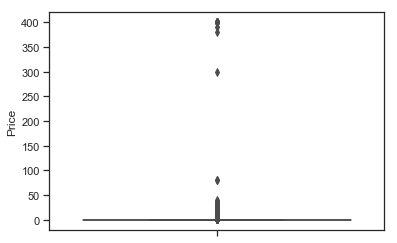

In [84]:

sns.boxplot(data['Price'], orient='vertical')

<font color = red>
4a- ii. Do you expect apps on the play store to cost $200? Check out these cases
    </font>

In [85]:
data[data['Price']>80]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


<font color = red>
    4a- iii. After dropping the useless records, make the suitable plot again to identify outliers<br>
        iv. Limit data to records with price < $30<br>
        </font>

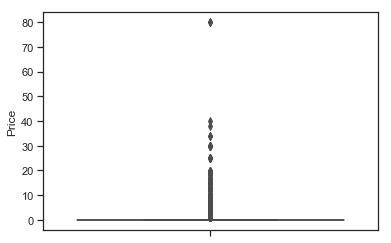

In [86]:
data.drop(data[data['Price']> 80].index, inplace=True)
sns.boxplot(data['Price'], orient='vertical')

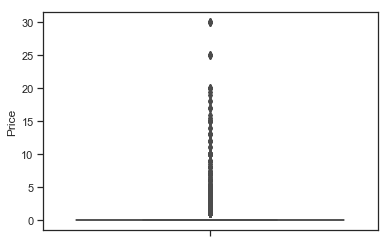

In [87]:
data.drop(data[data['Price']>= 30].index, inplace=True)
sns.boxplot(data['Price'], orient='vertical')

<font color = red>
4b-  Reviews column<br>
i. Make suitable plot<br>
ii. Limit data to apps with < 1 Million reviews<br>

In [88]:
data['Reviews'].describe()

count    9.338000e+03
mean     5.155891e+05
std      3.148627e+06
min      1.000000e+00
25%      1.890000e+02
50%      6.011500e+03
75%      8.247100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

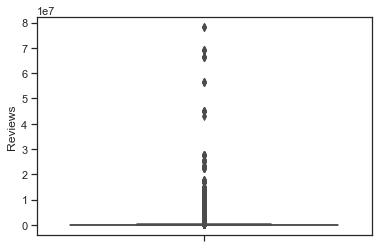

In [89]:
sns.boxplot(data['Reviews'], orient='vertical')

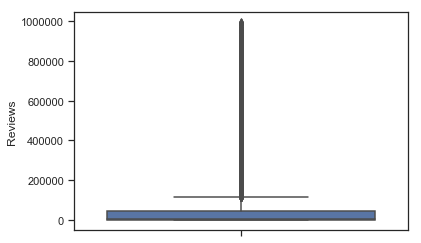

In [90]:
data.drop(data[data['Reviews']>= 1000000].index, inplace=True)
sns.boxplot(data['Reviews'], orient='vertical')

<font color = red>
4c- Installs<br>
i. What is the 95th percentile of the installs?<br>
ii. Drop records having a value more than the 95th percentile
    </font>

In [91]:
data.Installs.quantile(0.95)

10000000.0

In [92]:
data.drop(data[data['Installs']>data.Installs.quantile(0.95)].index, inplace=True)

<font color = red>
5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?<br>
a. How do you explain this?<br>
b. What is the implication of this on your analysis?<br>
    </font>

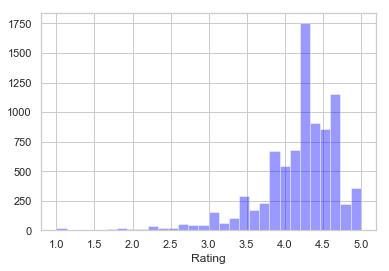

In [93]:
sns.set_style('whitegrid')
sns.distplot(data['Rating'], kde=False, color = 'blue', bins= 30)

This shows that the rating is left skewed and most of the apps are rated between 4 and 5. The tail is towards the lower values.
This means very few apps are rated low which is good for the apps. This do not much help in the analysis as we need to check other factors with this to conclude anything like, how many reviews have been done for the apps as one app may have very low reviews and high rating and another app might have very high number of reviews and average rating.

<font color = red>
6. What are the top Content Rating values?<br>
a. Are there any values with very few records?<br>
b. If yes, drop those as they won’t help in the analysis<br>
    </font>

In [94]:
data['Content Rating'].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

Adults and unrated can be droped as the value count is extremely low and of no use to us

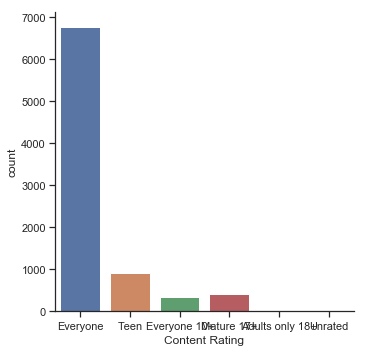

In [95]:
sns.set_style('ticks')
sns.catplot(x='Content Rating', kind='count', data=data)

In [96]:
data.drop(data[data['Content Rating'] == 'Adults only 18+'].index, inplace=True)
data.drop(data[data['Content Rating'] == 'Unrated'].index, inplace=True)
data['Content Rating'].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: Content Rating, dtype: int64

<font color=red>
7. Effect of size on rating<br>
a. Make a joinplot to understand the effect of size on rating<br>
b. Do you see any patterns?<br>
c. How do you explain the pattern?<br>
    </font>

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


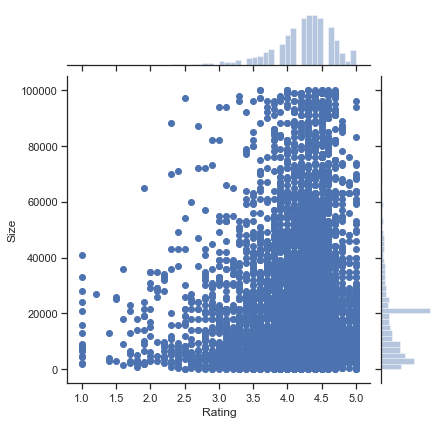

In [97]:
sns.jointplot('Rating','Size', data=data,color='b')

With the above plot, we see a very clear pattern-<br>
<br>
If we talk about rating only then we see that it is concentrated heavily between 4-5<br>
If we talk about only size then we see that size is concentrated heavily between 0-20000<br>
together if we see that maximum of the apps have rating very high if the size is less.<br>
<br>
This makes us to beleive that users prefer apps that are majorly small in size or even medium.<br>
If you see the graph, the blue dots are heavily concentrated where the rating is 4 and above and size is 40000 and below.<br>

<font color=red>
 8. Look at all the numeric interactions together –<br>
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'
    </font>

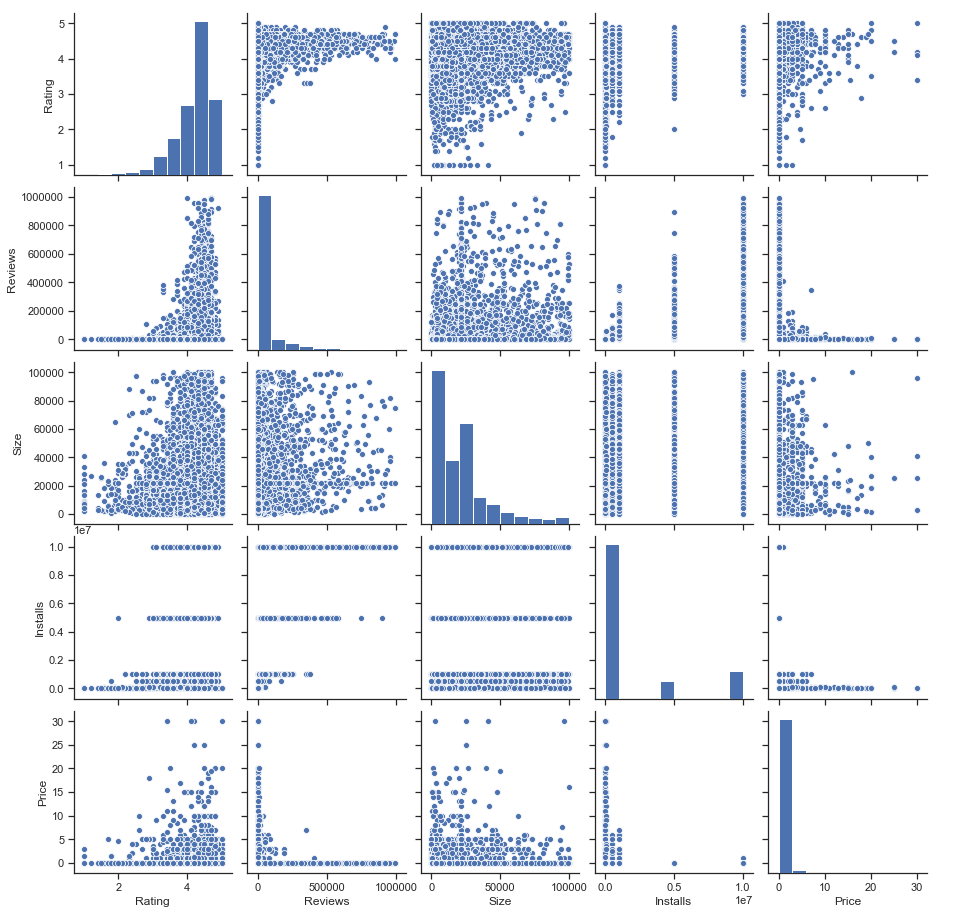

In [98]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data, height=2.5)

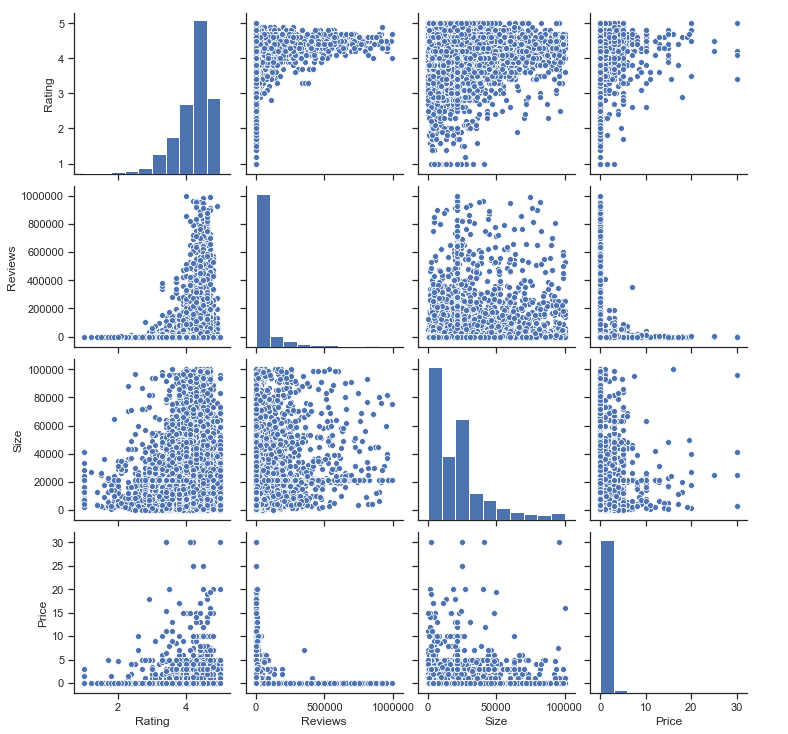

In [99]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(data, vars=['Rating','Reviews','Size','Price'],height=2.5)

<font color=red>
9. Rating vs. content rating<br>
a. Make a bar plot displaying the rating for each content rating<br>
b. Which metric would you use? Mean? Median? Some other quantile?<br>
c. Choose the right metric and plot</font>

G:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


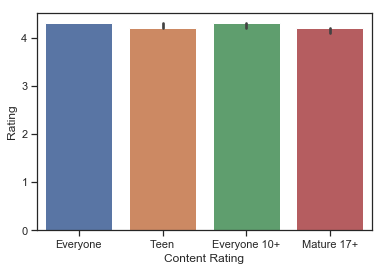

In [100]:
from numpy import median
sns.barplot(x='Content Rating', y='Rating', data=data, estimator=median)

Median is used as an estimator for each categorical bin because the rating is left skewed and for a skewed distribution median is a  more ideal measure of central tendency to depict the distribution.

<font color= red>
10. Content rating vs. size vs. rating – 3 variables at a time<br>
a. Create 5 buckets (20% records in each) based on Size<br>
b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination<br>
c. Make a heatmap of this<br>
i. Annotated<br>
ii. Greens color map<br>
d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?<br>
    </font>

In [101]:
data['size_bucket']=pd.qcut(data['Size'], q=5)

In [102]:
data['size_bucket'].value_counts()

(12000.0, 21516.53]    2310
(4600.0, 12000.0]      1789
(8.499, 4600.0]        1713
(32000.0, 100000.0]    1682
(21516.53, 32000.0]     937
Name: size_bucket, dtype: int64

In [103]:
data.size_bucket= data.size_bucket.astype('object')

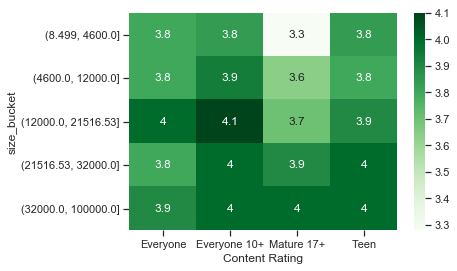

In [104]:
data_heat= data.pivot_table(values='Rating', index='size_bucket', columns='Content Rating',aggfunc=lambda x: np.percentile(x,20))
sns.heatmap(data_heat,annot=True, cmap='Greens')

With 20 percentile of ratings, we see that heavier apps are preferred more then lighter apps in all categories, though the difference is not much.